In [13]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("student_feedback.csv")
df.head()
df.info()
df.describe()
df.columns
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Unnamed: 0                                            1001 non-null   int64
 1   Student ID                                            1001 non-null   int64
 2   Well versed with the subject                          1001 non-null   int64
 3   Explains concepts in an understandable way            1001 non-null   int64
 4   Use of presentations                                  1001 non-null   int64
 5   Degree of difficulty of assignments                   1001 non-null   int64
 6   Solves doubts willingly                               1001 non-null   int64
 7   Structuring of the course                             1001 non-null   int64
 8   Provides support for students going above and beyond  1001 non-null   int64
 9

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

DATA CLEANING

In [14]:
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.drop(columns=["Student ID"], inplace=True, errors='ignore')

print(df.isnull().sum())

Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64


Descriptive Statistics


In [15]:
stats = df.agg(['mean', 'median', 'std']).T
stats.columns = ['Mean', 'Median', 'Standard Deviation']
print(stats.sort_values('Mean', ascending=False))

                                                        Mean  Median  \
Well versed with the subject                        7.497502     8.0   
Explains concepts in an understandable way          6.081918     6.0   
Use of presentations                                5.942058     6.0   
Provides support for students going above and b...  5.662338     6.0   
Structuring of the course                           5.636364     6.0   
Course recommendation based on relevance            5.598402     6.0   
Solves doubts willingly                             5.474525     6.0   
Degree of difficulty of assignments                 5.430569     5.0   

                                                    Standard Deviation  
Well versed with the subject                                  1.692998  
Explains concepts in an understandable way                    2.597168  
Use of presentations                                          1.415853  
Provides support for students going above and b...         

Data Visualization

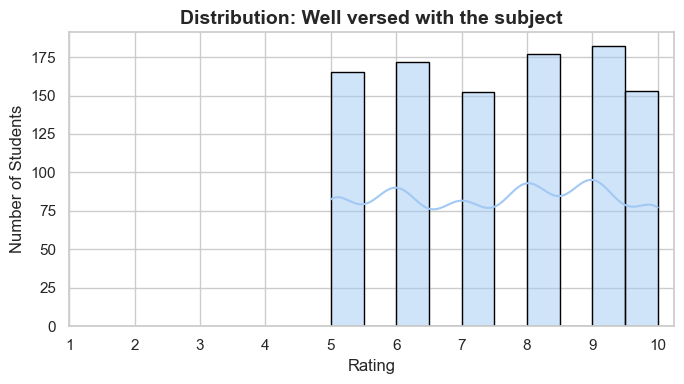

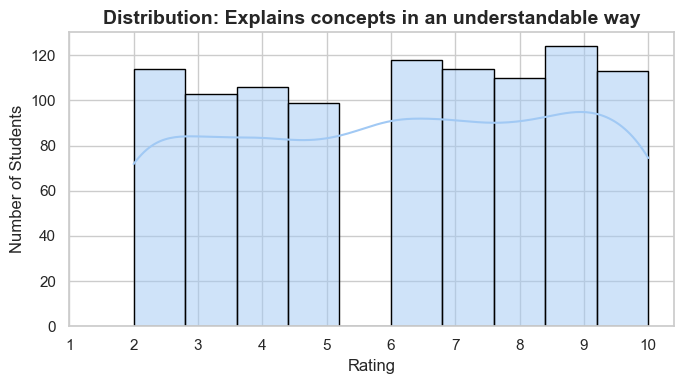

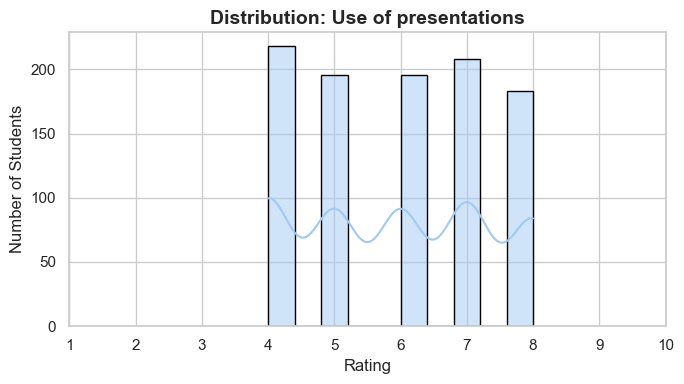

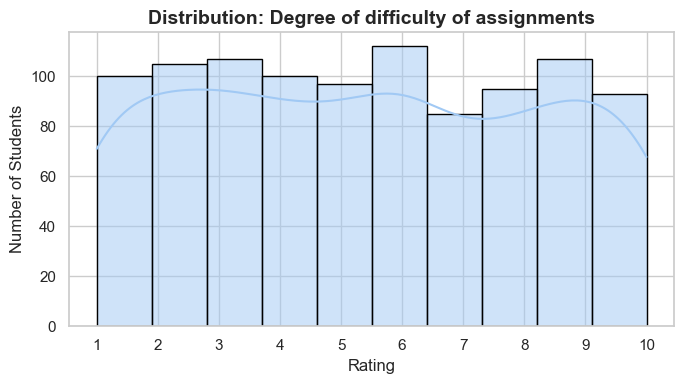

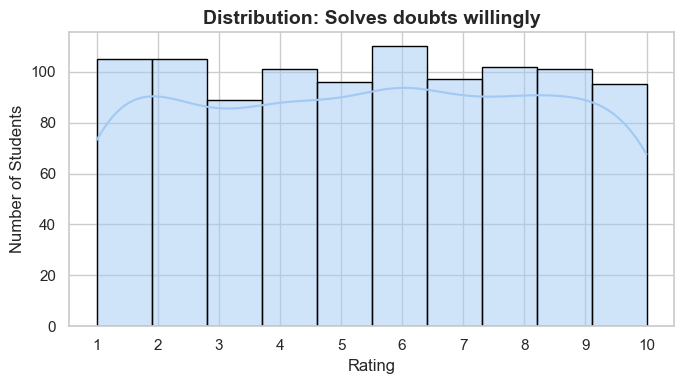

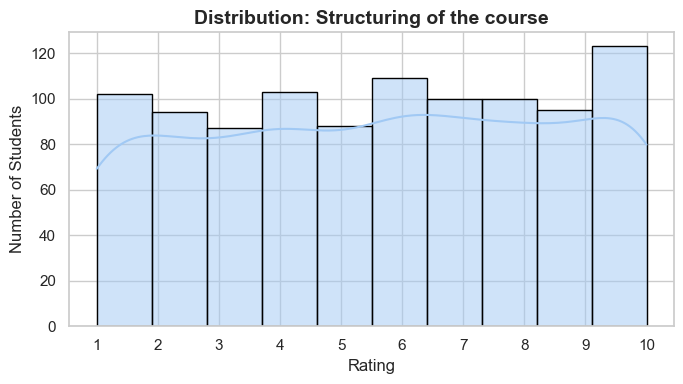

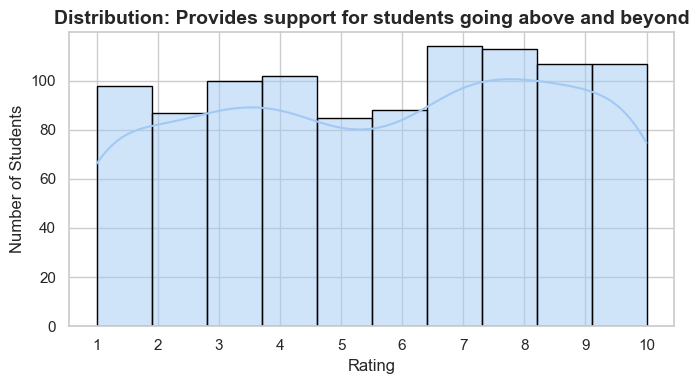

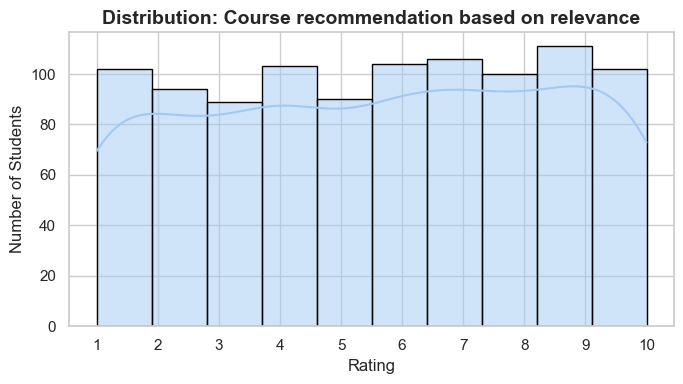

In [16]:
# Histogram + KDE for All Features
sns.set_style("whitegrid")  # Clean background
custom_palette = sns.color_palette("pastel")

for col in df.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=10, kde=True, color=custom_palette[0], edgecolor='black', linewidth=1)
    plt.title(f"Distribution: {col}", fontsize=14, fontweight='bold')
    plt.xlabel("Rating")
    plt.ylabel("Number of Students")
    plt.xticks(range(1, 11))  # since ratings are from 1–10
    plt.tight_layout()
    plt.show()

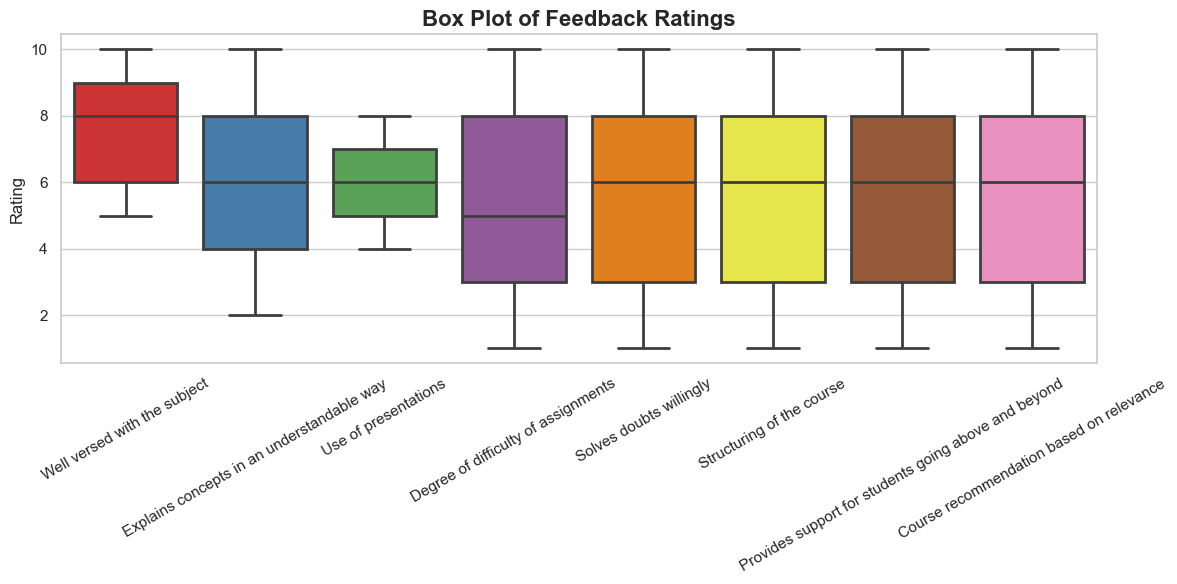

In [27]:
# Box Plot for Outlier Detection

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="Set1", linewidth=2, fliersize=5)  # fliersize controls outlier dot size
plt.title("Box Plot of Feedback Ratings", fontsize=16, fontweight='bold')
plt.ylabel("Rating")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_8168\1422760670.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="Blues_d")


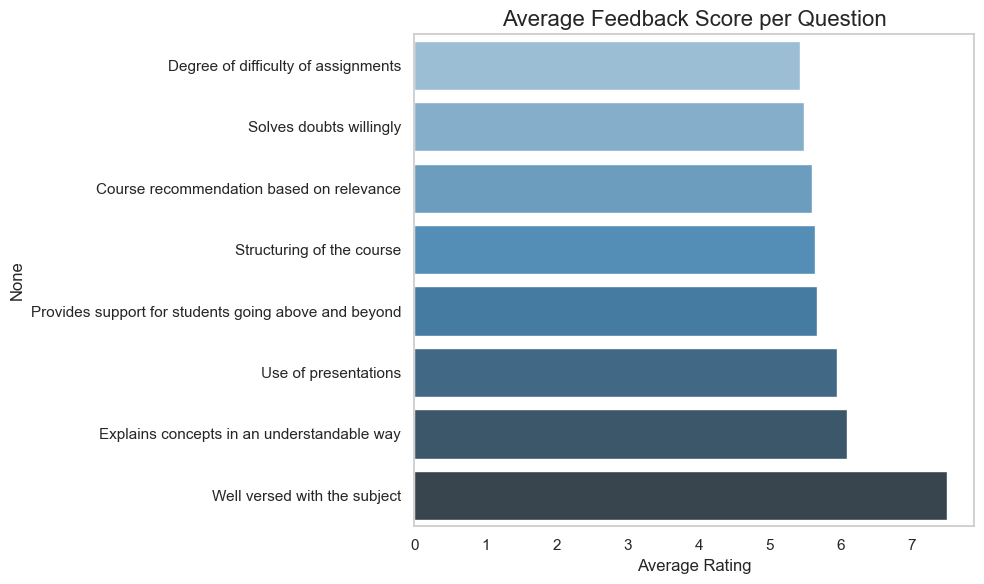

In [28]:
# Bar Plot of Average Score Per Question

avg_scores = df.mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_scores.values, y=avg_scores.index, palette="Blues_d")
plt.title("Average Feedback Score per Question", fontsize=16)
plt.xlabel("Average Rating")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

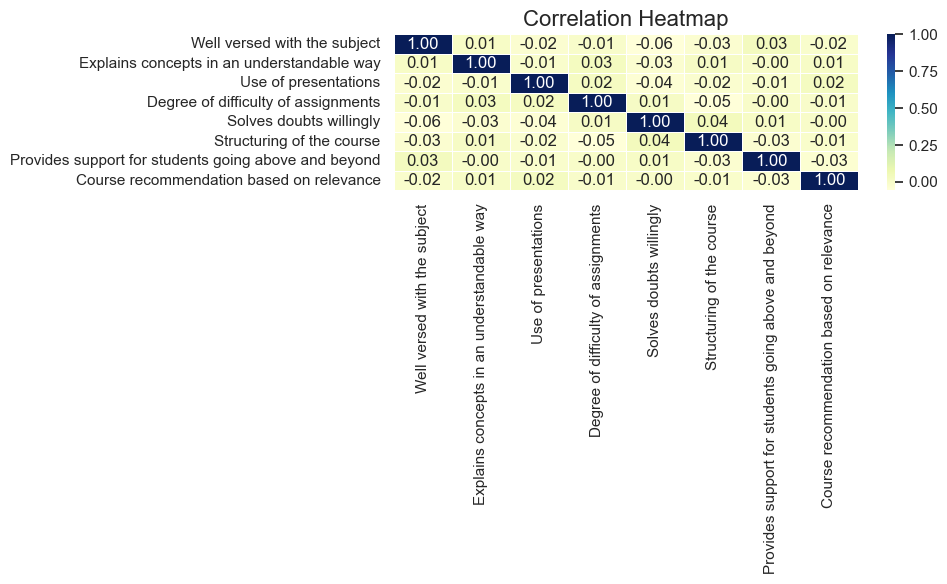

In [29]:
# Correlation Heatmap 

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

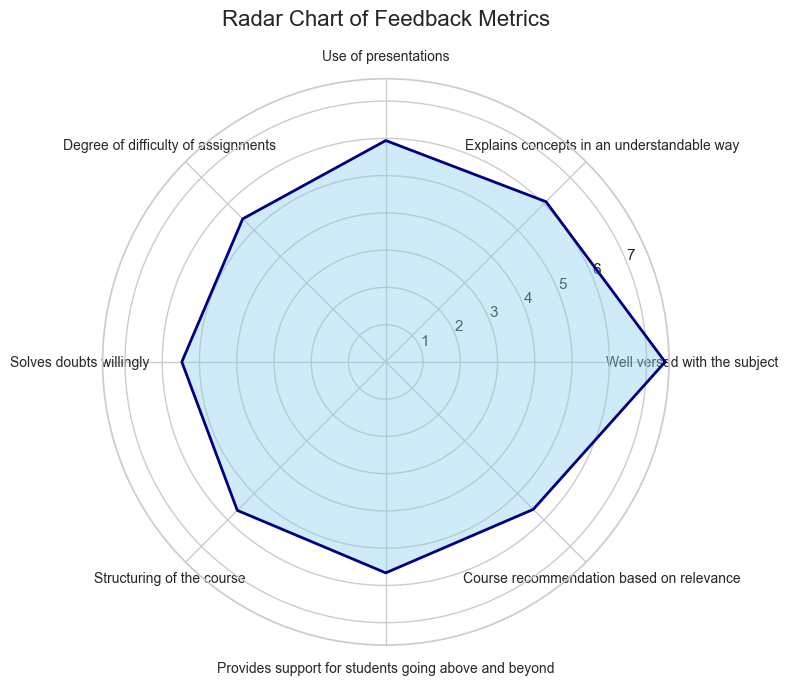

In [30]:
#  Radar Chart 

categories = list(df.columns)
values = df.mean().tolist()
values += values[:1]  

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='navy', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='skyblue', alpha=0.4)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.set_title("Radar Chart of Feedback Metrics", y=1.08, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Pairplot 

corr = df.corr().abs()
top_cols = corr['Course recommendation based on relevance'].sort_values(ascending=False)[1:5].index.tolist()

sns.pairplot(df[top_cols], diag_kind='kde', corner=True,
             plot_kws={'alpha': 0.5, 's': 40, 'edgecolor': 'k'},
             diag_kws={'shade': True, 'color': 'teal'})
plt.suptitle("Focused Pairplot on Top Correlated Feedback", y=1.02, fontsize=16, fontweight='bold')
plt.show()